#<font size=40>A Data Mining Analysis for Dietary Recommendations for Diabetes</font><br>

# Project 30% Data Mining

This study uses data mining techniques to predict diabetes and provide dietary recommendations based on nutritional analysis.

## Group 23 TT5L

|   | Student ID   | Student Name                                           | Contribution (%)|
|--:|:-------------|:-------------------------------------------------------|-------------|
| 1 | 1211103984   | Nur Afreen Junaidah binti Noorul Ameen Mohamed Eliyas                                    |      25     |
| 2 | 1211101619   | Nik Syareena Aida Binti Nik Ahmad Faizul               |     25        |
| 3 | 1211103293   | Farah Kamila Binti Yahya  |    25         |
| 4 | 1211103282   | Aida Maisarah Hisam                               |      25       |


#### Before we start, we would like to mention that we work all of these using Google Colab instead of Jupyter Notebook, so there can be a little difference in visual result if run using Jupyter Notebook and compared to our report.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. EDA & Preprocessing

In [ ]:
df = pd.read_csv("diabetes.csv")
pd.set_option('display.max_columns', None)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
#convert all features to integer except bmi
cols = df.columns.drop('BMI')
df[cols] = df[cols].astype(int)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26.0,0,0,0,1,0,1,0,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26.0,1,1,0,0,1,0,0,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26.0,0,0,0,1,1,1,0,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28.0,1,0,0,1,1,1,0,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29.0,1,0,0,1,1,1,0,1,0,2,0,0,0,0,8,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37.0,0,0,0,0,0,1,0,1,0,4,0,0,0,0,6,4,1
70688,1,0,1,1,29.0,1,0,1,0,1,1,0,1,0,2,0,0,1,1,10,3,6
70689,1,1,1,1,25.0,0,0,1,0,1,0,0,1,0,5,15,0,1,0,13,6,4
70690,1,1,1,1,18.0,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11,2,4


**Data Dictionary:**

- Diabetes_binary: 0 = no diabetes 1 = prediabetes 2 = diabetes

- HighBP: 0 = no high BP 1 = high BP

- HighChol: 0 = no high cholesterol 1 = high cholesterol

- CholCheck 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

- BMI: Body Mass Index

- Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

- Stroke: (Ever told) you had a stroke. 0 = no 1 = yes

- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

- PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

- Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

- HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

- GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

- MentHlth: days of poor mental health scale 1-30 days

- PhysHlth: physical illness or injury days in past 30 days scale 1-30

- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

- Sex: 0 = female 1 = male

- Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older



In [ ]:
df.shape

(70692, 22)

In [ ]:
#checking missing values
df.isna().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
#check duplicated rows
df.duplicated().sum()

1635

In [ ]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

#keep duplcated rows as it is a survey of patients and some patients have the same records

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0,0,0,1,22.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,6,6,8
689,0,0,0,1,26.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,6,6,8
891,0,0,0,1,24.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,6,6,8
1092,0,0,0,1,21.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,5,6,8
1326,0,1,0,1,29.0,0,0,0,1,0,1,0,1,0,2,0,0,0,1,10,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,1,1,1,1,27.0,1,0,0,1,1,1,0,1,0,4,0,0,0,1,12,6,8
69939,1,1,1,1,27.0,1,0,0,1,1,1,0,1,0,3,0,0,0,1,12,6,8
70305,1,1,0,1,30.0,0,0,0,0,0,0,0,1,0,3,0,0,0,1,9,4,7
70591,1,1,1,1,30.0,0,0,1,1,1,1,0,1,0,2,0,0,0,1,10,6,8


In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26.0,0,0,0,1,0,1,0,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26.0,1,1,0,0,1,0,0,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26.0,0,0,0,1,1,1,0,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28.0,1,0,0,1,1,1,0,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29.0,1,0,0,1,1,1,0,1,0,2,0,0,0,0,8,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37.0,0,0,0,0,0,1,0,1,0,4,0,0,0,0,6,4,1
70688,1,0,1,1,29.0,1,0,1,0,1,1,0,1,0,2,0,0,1,1,10,3,6
70689,1,1,1,1,25.0,0,0,1,0,1,0,0,1,0,5,15,0,1,0,13,6,4
70690,1,1,1,1,18.0,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11,2,4


In [ ]:
#drop features unrelated to health
df.drop(columns=['Education', 'Income'], inplace=True)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,0,1,26.0,0,0,0,1,0,1,0,1,0,3,5,30,0,1,4
1,0,1,1,1,26.0,1,1,0,0,1,0,0,1,0,3,0,0,0,1,12
2,0,0,0,1,26.0,0,0,0,1,1,1,0,1,0,1,0,10,0,1,13
3,0,1,1,1,28.0,1,0,0,1,1,1,0,1,0,3,0,3,0,1,11
4,0,0,0,1,29.0,1,0,0,1,1,1,0,1,0,2,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37.0,0,0,0,0,0,1,0,1,0,4,0,0,0,0,6
70688,1,0,1,1,29.0,1,0,1,0,1,1,0,1,0,2,0,0,1,1,10
70689,1,1,1,1,25.0,0,0,1,0,1,0,0,1,0,5,15,0,1,0,13
70690,1,1,1,1,18.0,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11


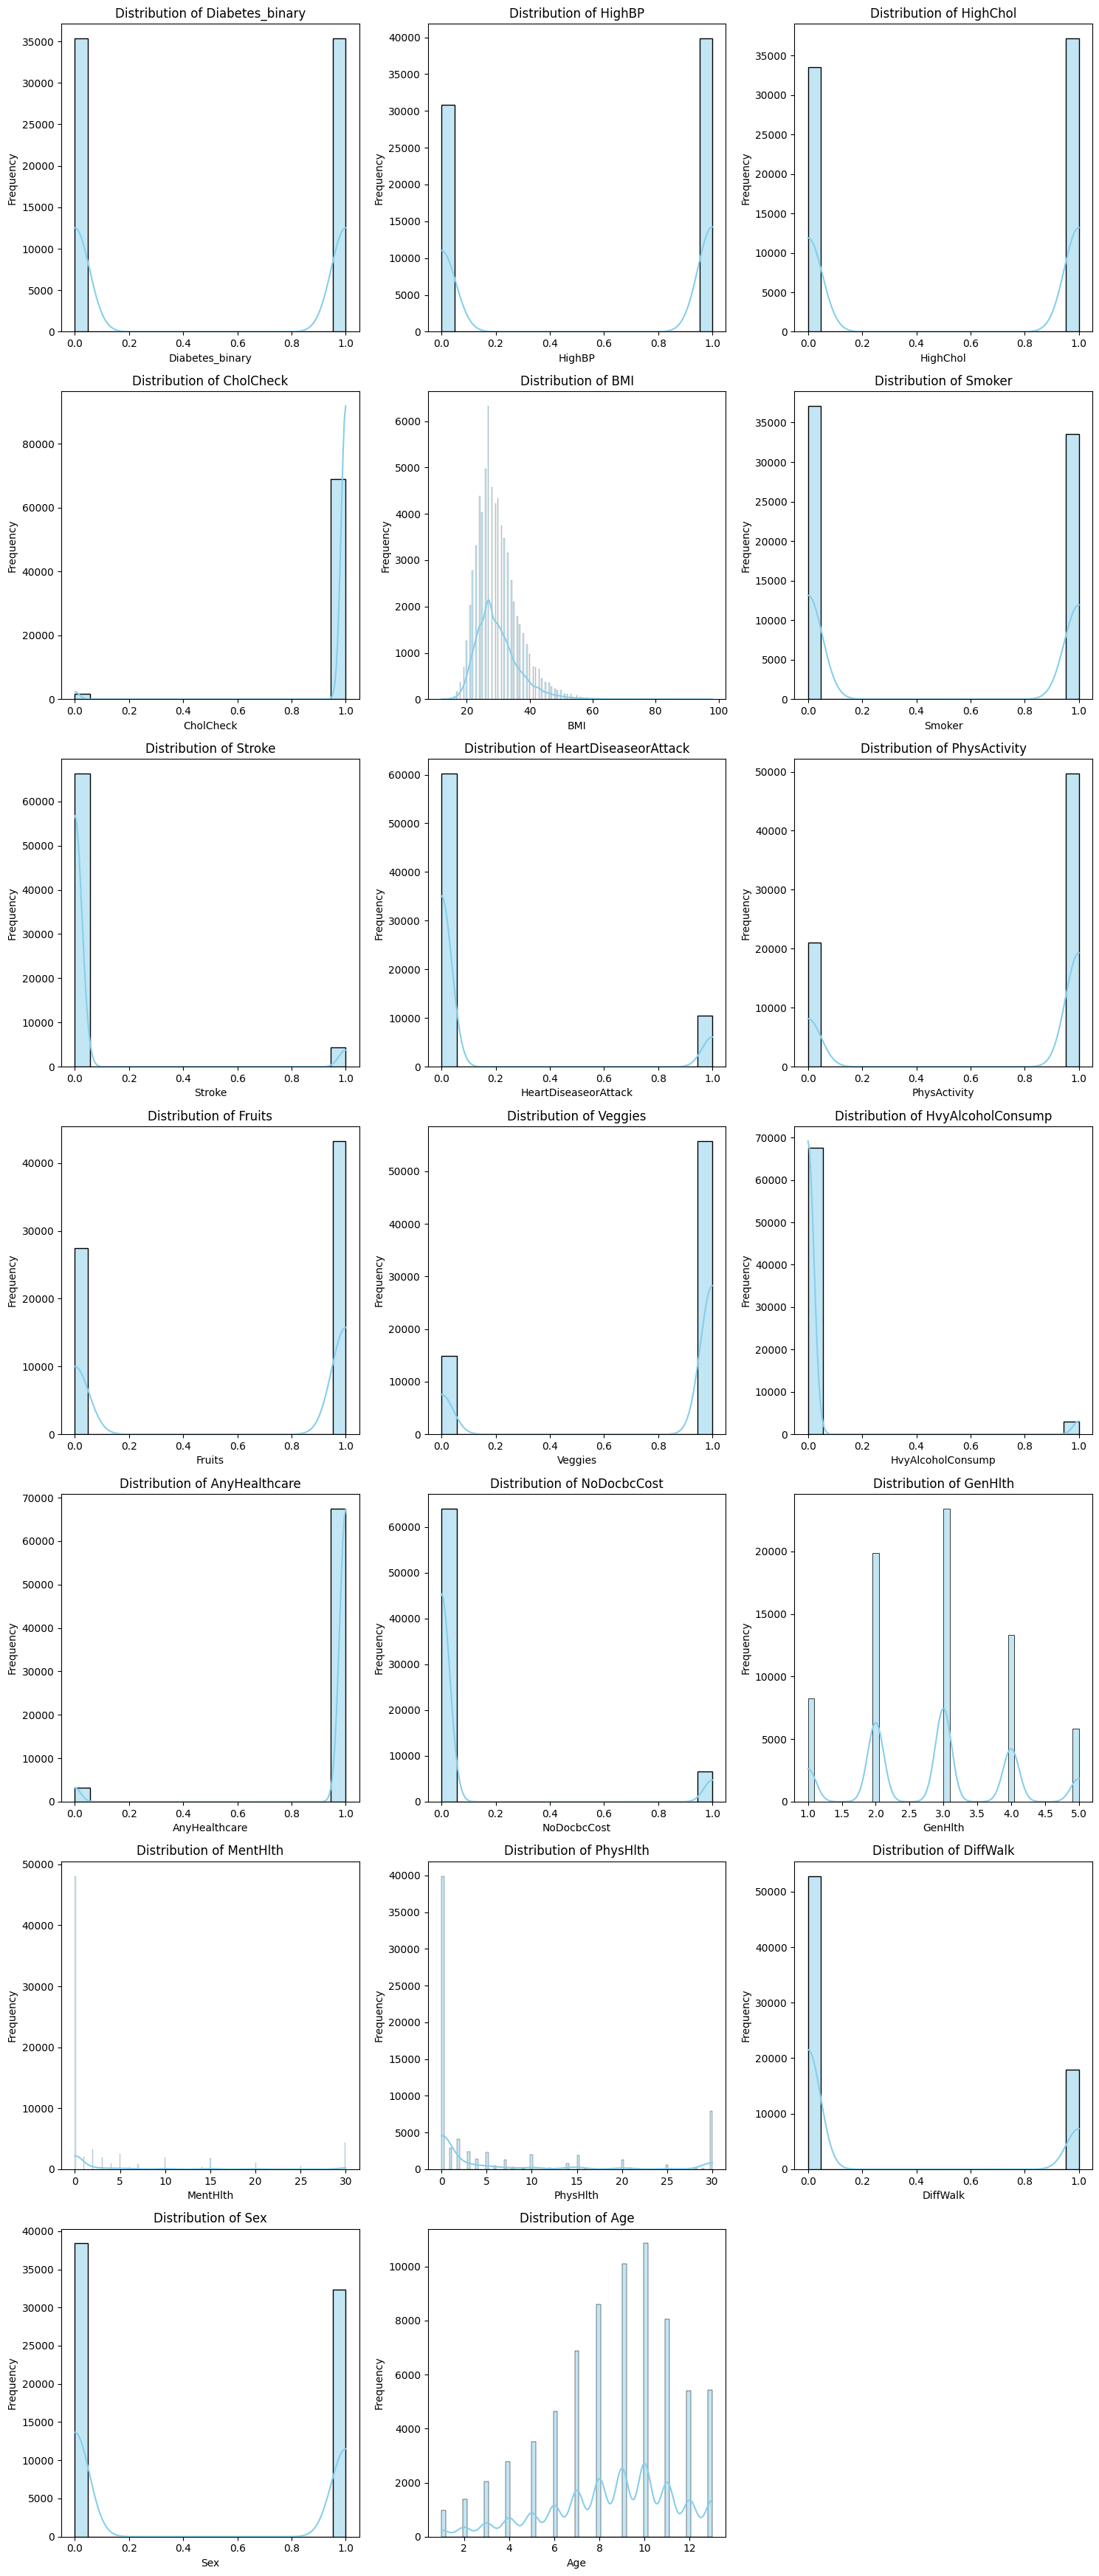

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Determine the number of rows needed for subplots based on the number of numerical columns
num_plots = len(numerical_columns) to
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

plt.figure(figsize=(15, 5 * num_rows))

# Create a histogram or density plot for each numerical variable
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Key Takeaways:

1.HighBP (High Blood Pressure) & HighChol (High Cholesterol):

- Significant number of individuals affected.
- Indicates a strong association with diabetes risk.

2.Diabetes_binary Distribution:

- There seem to be no class imbalance for the target variable.

3.Class Imbalance in Other Features:

- Smoker, Stroke, HeartDiseaseorAttack are skewed towards non-affected individuals.

4.BMI Distribution:

- Right-skewed with most values between 20 and 40.
- Some extreme outliers exceeding 50.
- Reflects common obesity trends, a major risk factor for diabetes.

5.PhysActivity (Physical Activity):

- Majority of individuals engage in physical activity.
- Inversely correlates with diabetes risk, showing its protective role.


In [ ]:
# calculate the correlation matrix
correlation_matrix = df.corr()
pd.set_option('display.max_columns', None)
correlation_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,-0.079293,-0.094853,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096


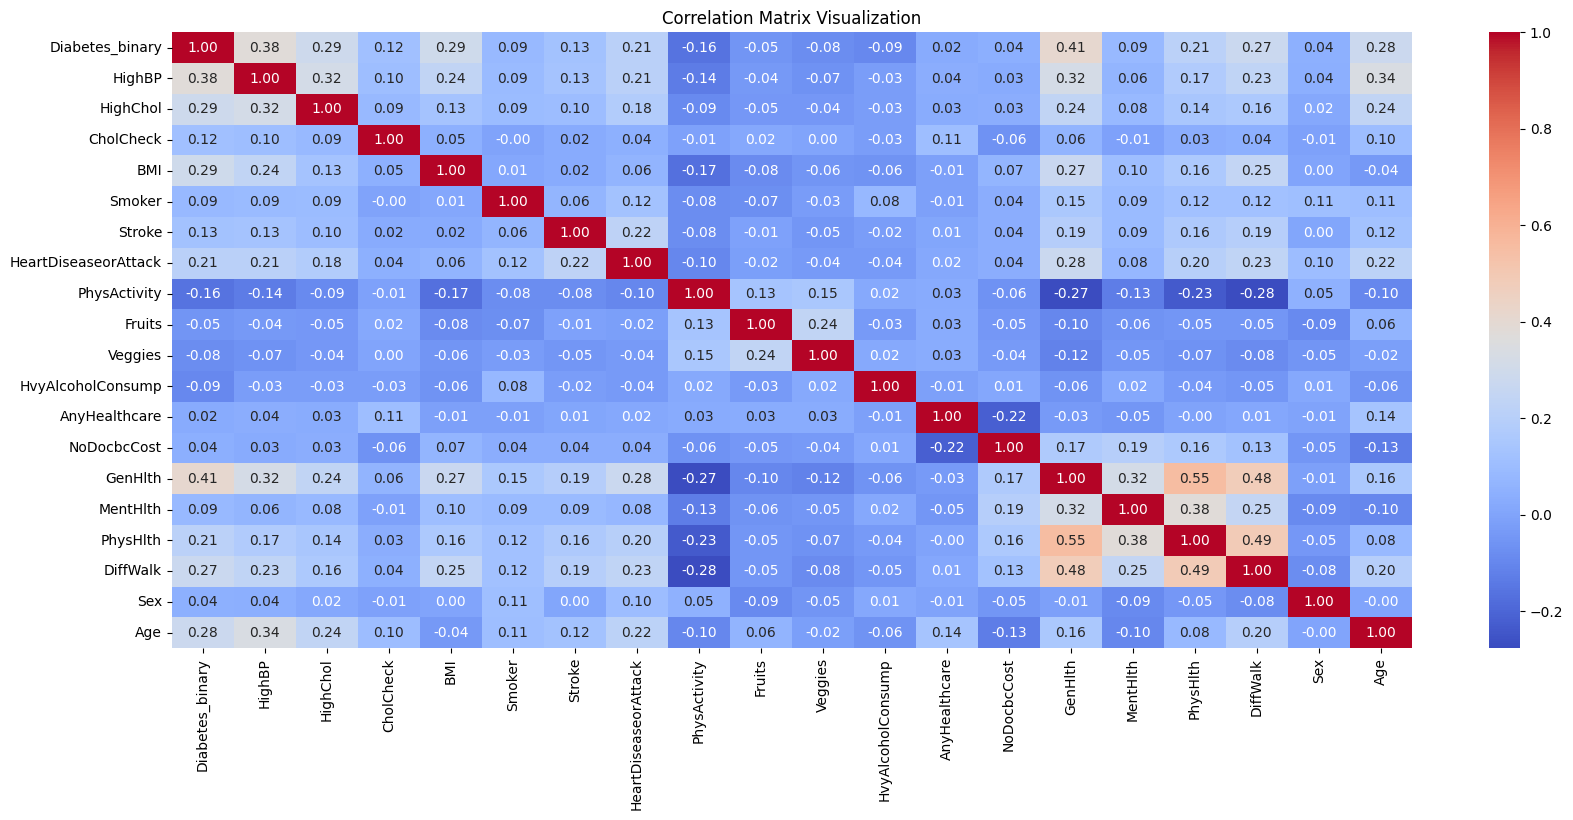

In [ ]:
# plotting the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Visualization')
plt.show()

#Key Takeaways:
**Strongest Correlations with Diabetes (Diabetes_binary)** :
- HighBP (0.38) and HighChol (0.29):
High blood pressure and high cholesterol have the strongest correlations with diabetes, making them key risk factors.
- BMI (0.29):
Higher BMI is associated with diabetes, indicating that obesity is a significant predictor.
- GenHlth (0.41):
Poor self-reported general health has the highest correlation with diabetes, which suggests that people with diabetes often perceive their overall health as poor.
- PhysHlth (0.21) and DiffWalk (0.27):
Poor physical health and difficulty walking show a moderate correlation, indicating mobility issues and other physical ailments are more common in diabetic individuals.
- (0.28):
Older individuals have a higher likelihood of diabetes, reinforcing age as an important risk factor.


#2. K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df.select_dtypes(include=[np.number]).columns.tolist()
data_clustr = df[features]

# scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustr)

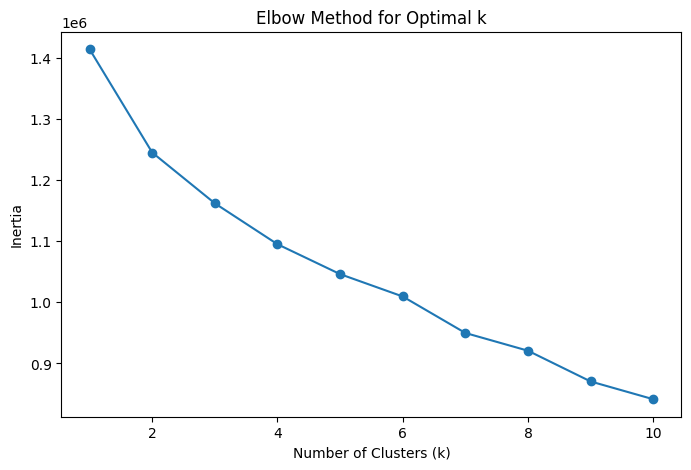

In [ ]:
# determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# plot the elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

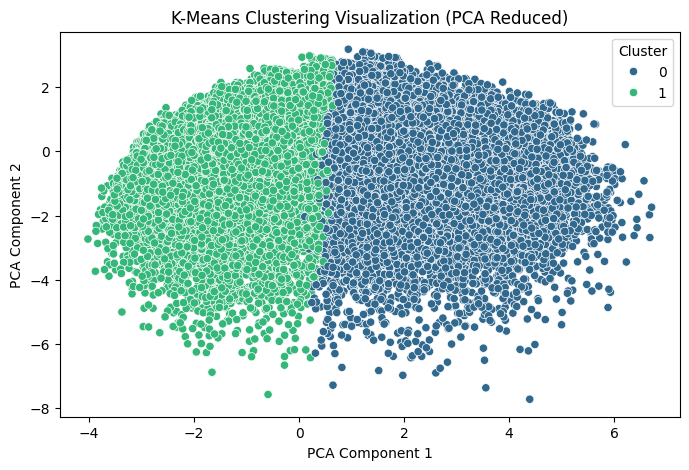

Cluster
1    45583
0    25109
Name: count, dtype: int64


In [ ]:
from sklearn.decomposition import PCA
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters

#visualizing clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.legend(title='Cluster')
plt.show()

print(df['Cluster'].value_counts())

In [ ]:
#feature importance analysis within clusters

from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Diabetes_binary', 'Cluster'])
y = df['Cluster']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

#feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)


DiffWalk                0.244895
GenHlth                 0.185805
PhysHlth                0.135037
BMI                     0.065376
HighBP                  0.063847
HeartDiseaseorAttack    0.063080
PhysActivity            0.055431
Age                     0.038844
MentHlth                0.037407
HighChol                0.031534
Stroke                  0.020427
Smoker                  0.012836
Veggies                 0.012056
Fruits                  0.010064
Sex                     0.008446
NoDocbcCost             0.006817
HvyAlcoholConsump       0.003808
AnyHealthcare           0.002677
CholCheck               0.001612
dtype: float64


# Key takeaways:

- Clusters represent overall health conditions rather than just diabetes status.
- Mobility issues, chronic diseases, and self-reported health are key differentiators.
- Demographics (age, sex) and lifestyle choices (diet, alcohol) have little effect on clustering.
- Clusters may reflect "healthy" vs. "unhealthy" individuals rather than purely diabetic vs. non-diabetic groups.



## 3. Feature Selection using Random Forest Importance


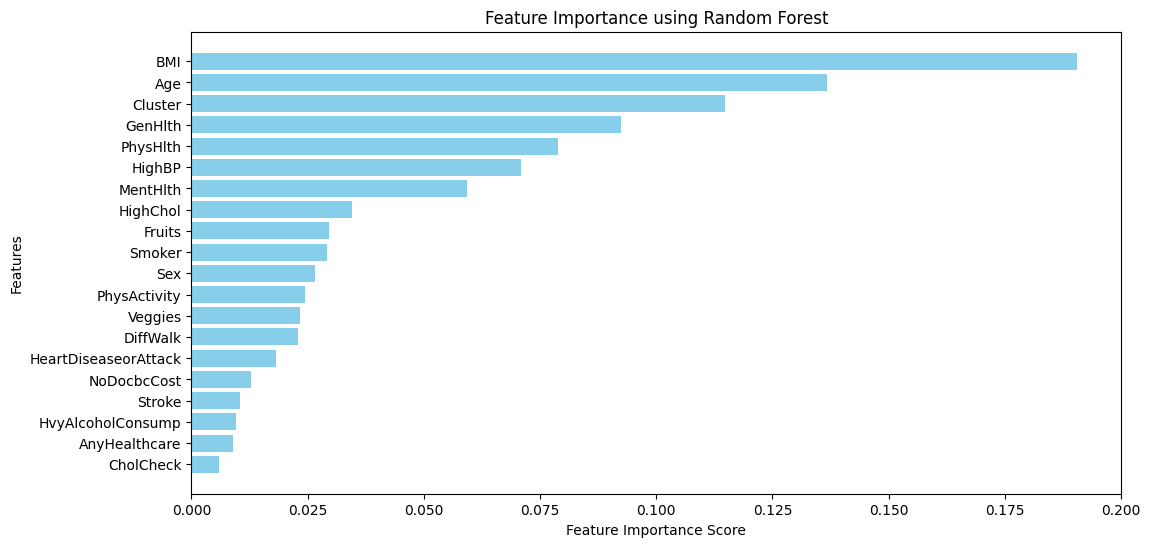

Top Features (Random Forest Importance): Index(['BMI', 'Age', 'Cluster', 'GenHlth', 'PhysHlth', 'HighBP', 'MentHlth',
       'HighChol', 'Fruits', 'Smoker'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#get feature importance scores
importances = model.feature_importances_
feature_names = X.columns
#sort feature importance values
sorted_indices = np.argsort(importances)[::-1]

#plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()

# top N important features
num_features = 10
selected_features = feature_names[sorted_indices][:num_features]
print("Top Features (Random Forest Importance):", selected_features)


#Key findings:

1. BMI (Most important feature)

- Strongest predictor of diabetes.
- Higher BMI is associated with a higher risk of developing diabetes.

2. Age

- Older individuals are more likely to have diabetes.
- Supports the age-related risk factor for diabetes.

3. Cluster

- Clusters contribute significantly to diabetes prediction.
- Confirms that K-Means clustering captured meaningful subgroups related to diabetes risk.

4. General Health (GenHlth)

- Self-reported health status is a strong predictor.
- Individuals who rate their health as poor are more likely to have diabetes.

5. Physical Health (PhysHlth)

- More days of poor physical health increase diabetes risk.
- Suggests that diabetes impacts overall physical well-being.

6. High Blood Pressure (HighBP)

- Hypertension is strongly correlated with diabetes.
- Individuals with high blood pressure have a greater likelihood of being diabetic.

7. Mental Health (MentHlth)

- Surprisingly high importance, indicating potential links between mental health and diabetes.
- Diabetes management challenges may contribute to mental health issues.

8. High Cholesterol (HighChol)

- Individuals with high cholesterol are at higher risk of diabetes.
- Suggests metabolic syndrome may be a common factor.

9. Fruits Consumption

- Moderate importance in predicting diabetes.
- May be indirectly related to diet and overall health choices.

10. Smoker

- Smoking status plays a role in diabetes risk, but lower than expected.
- Possible link through cardiovascular and metabolic effects.



# 4. PCA

In [ ]:
from sklearn.decomposition import PCA

pca_data = df[features]

#scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_data)

In [ ]:
#applying PCA
pca = PCA(n_components=15)
principal_components = pca.fit_transform(data_scaled)

#create a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4','Principal Component 5',
                                                          'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10',
                                                          'Principal Component 11', 'Principal Component 12', 'Principal Component 13', 'Principal Component 14','Principal Component 15'])


final_df = pd.concat([pca_df, df[['Diabetes_binary']]], axis=1)

# print explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")
print(f"Total Variance Explained by 15 Components: {sum(explained_variance) * 100:.2f}%")


Explained Variance: [0.17557072 0.08692171 0.06587659 0.06051208 0.05607443 0.05209573
 0.04904232 0.04695568 0.04438892 0.04311619 0.03978986 0.03777132
 0.0368307  0.03610997 0.03528474]
Total Variance Explained by 15 Components: 86.63%


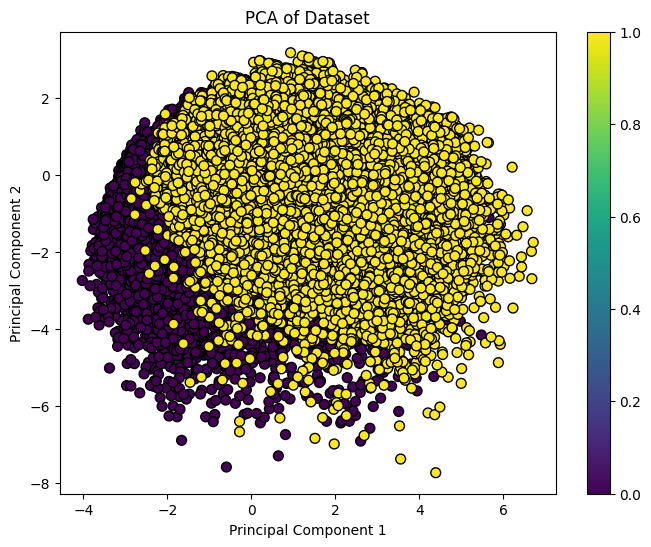

In [ ]:
#pca plot
plt.figure(figsize=(8,6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'],
            c=df['Diabetes_binary'],
            cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()


- 15 Principal Components retain 86.83% of the total variance in the dataset.
- Some separation is visible (darker points cluster in some areas), but the classes overlap, meaning diabetes is not perfectly separable in PCA space.
- This suggests that linear transformation alone may not fully distinguish diabetics from non-diabetics, requiring further feature engineering or more complex modeling (e.g., tree-based methods).


# 5. Classification modelling
We build classifier models Logistic Regression, Random Forest, Decision Trees, K-Nearest Neighbours, and Support Vector Machine for the dataset with 10 most important features and dataset after PCA.

In [ ]:
# form a data frame for the dataset with only the 10 selected important features.
selected_df = df[selected_features]
selected_df = pd.concat([selected_df, df['Diabetes_binary']], axis=1)

selected_df

,BMI,Age,Cluster,GenHlth,PhysHlth,HighBP,MentHlth,HighChol,Fruits,Smoker,Diabetes_binary
0,26.0,4,1,3,30,1,5,0,0,0,0
1,26.0,12,0,3,0,1,0,1,1,1,0
2,26.0,13,1,1,10,0,0,0,1,0,0
3,28.0,11,1,3,3,1,0,1,1,1,0
4,29.0,8,1,2,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
70687,37.0,6,1,4,0,0,0,1,0,0,1
70688,29.0,10,0,2,0,0,0,1,1,1,1
70689,25.0,13,0,5,0,1,15,1,1,0,1
70690,18.0,11,0,4,0,1,0,1,0,0,1


In [ ]:
# check the data frame after PCA
final_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Diabetes_binary
0,-0.417002,-1.230994,-0.197267,-0.105010,0.666787,0.179909,1.828657,0.265704,0.430234,0.630594,-1.017843,0.500698,-0.414337,0.542948,-1.546815,0
1,1.040687,1.445995,-1.285813,1.655975,0.936078,-1.966268,-0.922408,0.853368,0.702611,-0.696339,1.494466,-1.397066,-1.246449,-2.747848,-0.091105,0
2,-2.132436,0.889617,0.675685,0.514217,0.372823,-0.605907,0.592337,-0.213277,-0.235061,-0.370475,-1.217047,-0.156195,-0.031567,-0.296294,-0.796845,0
3,-0.362087,1.506057,-0.116280,0.915342,-0.655058,0.702880,0.307766,-0.287606,-0.903727,0.322362,0.126106,-0.301181,-0.433475,-0.677755,-0.193412,0
4,-2.083785,-0.067029,0.884030,0.429405,0.466136,0.227588,0.124144,-0.322628,-0.658711,-0.629471,1.039657,-0.490825,0.487623,0.380649,0.498549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.300134,-0.408136,-0.334253,-2.100533,0.219001,0.178872,-0.323853,-0.181976,0.562066,-0.167176,0.802575,1.758322,-0.460915,-0.112593,0.181389,1
70688,1.190627,1.273195,-0.177192,1.268562,0.022922,-0.344646,0.459212,-1.045433,-0.506773,-1.335084,-0.328822,1.456909,0.158785,-0.527830,1.723019,1
70689,3.363608,0.818159,0.447006,-0.215084,0.856748,-1.314932,-1.438828,0.373012,-0.376005,0.306066,-1.882570,0.030895,-0.117235,0.141560,1.909603,1
70690,1.744709,0.606531,-0.986211,-1.275940,1.391637,-1.103813,-2.211940,0.547825,-0.762261,0.351931,-0.990178,0.163504,-0.186242,-0.027775,-0.684770,1


In [ ]:
# check if there is any class imbalance in the target variable for both data frame
print(selected_df['Diabetes_binary'].value_counts())
print(final_df['Diabetes_binary'].value_counts())

Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64
Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64


Since the classes in the target variable are equally distributed, there is no need for balancing the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# function to evaluate model performance
def evaluate(model, X_test, y_test, model_name, dataset_name):
    y_pred = model.predict(X_test)

    # evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\n--- {model_name} Performance ({dataset_name}) ---")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC Score: {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # confusion Matrix
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name} ({dataset_name})")
    plt.show()

# function to perform cross-validation
def cross_validation(model, X, y):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    return np.mean(cv_scores)

In [ ]:
def train_evaluate(df, dataset_name):
    print(f"\n=== Evaluating Models on {dataset_name} ===\n")

    X = df.drop(columns=['Diabetes_binary']) # features
    y = df['Diabetes_binary'] # target variable

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # iterate through the classifiers in dictionary
    for name, model in classifiers.items():
        print(f"\nTraining {name}...")

        model.fit(X_train_scaled, y_train)

        # evaluate performance
        evaluate(model, X_test_scaled, y_test, name, dataset_name)

        # perform 5-fold cross-validation
        mean_cv_score = cross_validation(model, X, y)
        print(f"K-Fold Cross Validation Accuracy: {mean_cv_score:.4f}")


=== Evaluating Models on Dataset with 10 Selected Important Features ===


Training Logistic Regression...

--- Logistic Regression Performance (Dataset with 10 Selected Important Features) ---
Test Accuracy: 0.7524
Precision: 0.7593
Recall: 0.7370
F1 Score: 0.7480
AUC-ROC Score: 0.7523

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      7090
           1       0.76      0.74      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



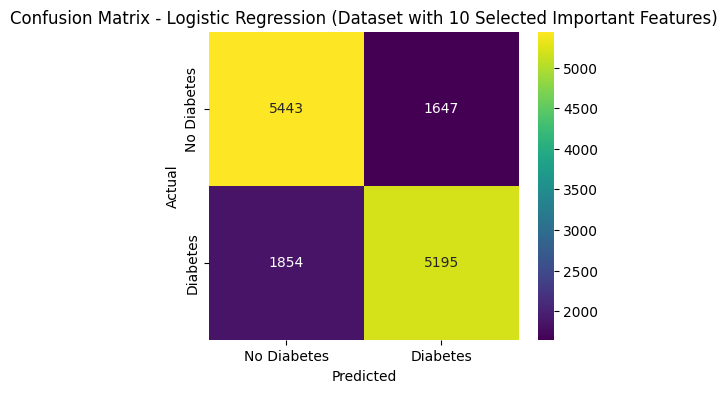

K-Fold Cross Validation Accuracy: 0.7516

Training Random Forest...

--- Random Forest Performance (Dataset with 10 Selected Important Features) ---
Test Accuracy: 0.7260
Precision: 0.7177
Recall: 0.7424
F1 Score: 0.7298
AUC-ROC Score: 0.7261

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      7090
           1       0.72      0.74      0.73      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



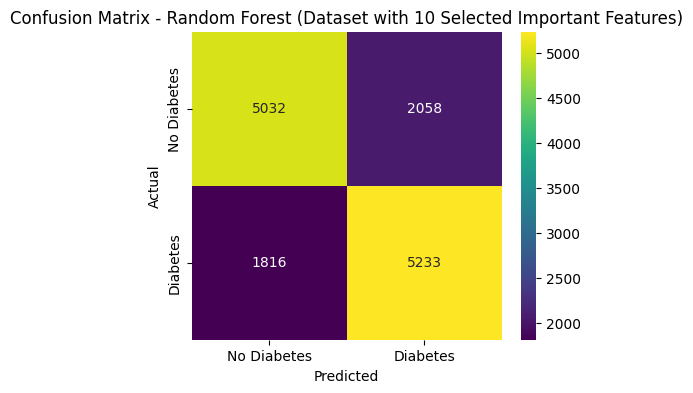

K-Fold Cross Validation Accuracy: 0.7278

Training Decision Tree...

--- Decision Tree Performance (Dataset with 10 Selected Important Features) ---
Test Accuracy: 0.6766
Precision: 0.6877
Recall: 0.6435
F1 Score: 0.6649
AUC-ROC Score: 0.6765

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      7090
           1       0.69      0.64      0.66      7049

    accuracy                           0.68     14139
   macro avg       0.68      0.68      0.68     14139
weighted avg       0.68      0.68      0.68     14139



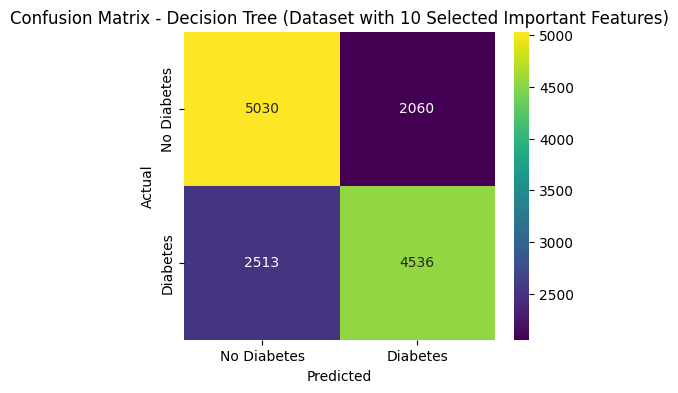

K-Fold Cross Validation Accuracy: 0.6814

Training K-Nearest Neighbors...

--- K-Nearest Neighbors Performance (Dataset with 10 Selected Important Features) ---
Test Accuracy: 0.7273
Precision: 0.7165
Recall: 0.7499
F1 Score: 0.7328
AUC-ROC Score: 0.7274

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      7090
           1       0.72      0.75      0.73      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



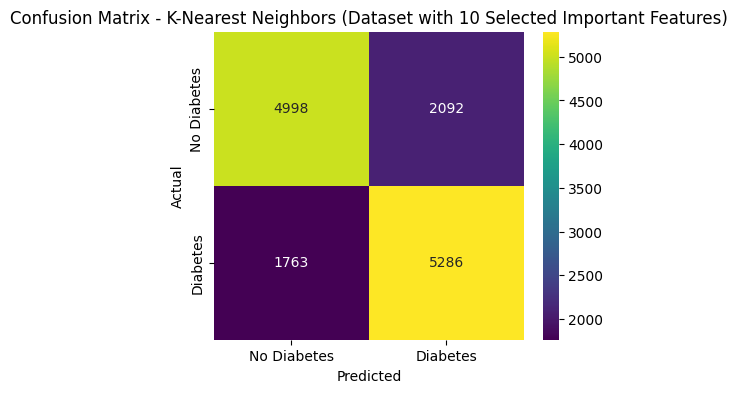

K-Fold Cross Validation Accuracy: 0.6947


In [ ]:
train_evaluate(selected_df, "Dataset with 10 Selected Important Features")


=== Evaluating Models on Dataset after PCA ===


Training Logistic Regression...

--- Logistic Regression Performance (Dataset after PCA) ---
Test Accuracy: 0.8703
Precision: 0.8687
Recall: 0.8716
F1 Score: 0.8701
AUC-ROC Score: 0.8703

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      7090
           1       0.87      0.87      0.87      7049

    accuracy                           0.87     14139
   macro avg       0.87      0.87      0.87     14139
weighted avg       0.87      0.87      0.87     14139



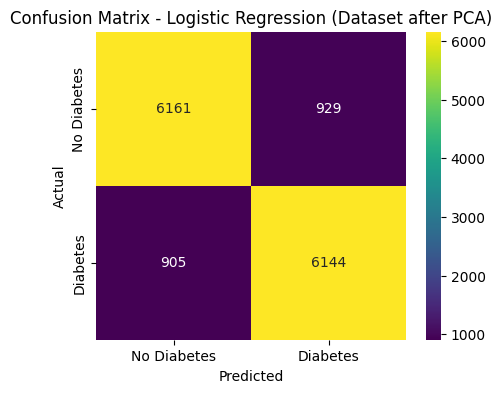

K-Fold Cross Validation Accuracy: 0.8703

Training Random Forest...

--- Random Forest Performance (Dataset after PCA) ---
Test Accuracy: 0.9295
Precision: 0.9175
Recall: 0.9434
F1 Score: 0.9303
AUC-ROC Score: 0.9295

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7090
           1       0.92      0.94      0.93      7049

    accuracy                           0.93     14139
   macro avg       0.93      0.93      0.93     14139
weighted avg       0.93      0.93      0.93     14139



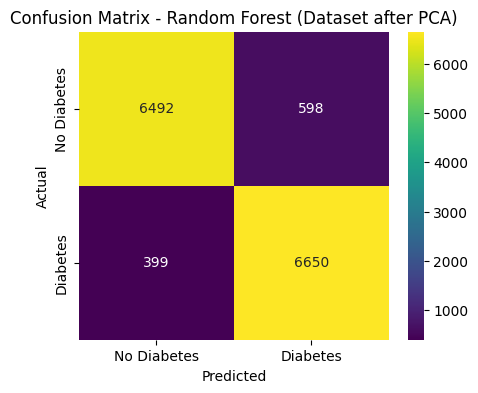

K-Fold Cross Validation Accuracy: 0.9274

Training Decision Tree...

--- Decision Tree Performance (Dataset after PCA) ---
Test Accuracy: 0.8900
Precision: 0.8900
Recall: 0.8893
F1 Score: 0.8897
AUC-ROC Score: 0.8900

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7090
           1       0.89      0.89      0.89      7049

    accuracy                           0.89     14139
   macro avg       0.89      0.89      0.89     14139
weighted avg       0.89      0.89      0.89     14139



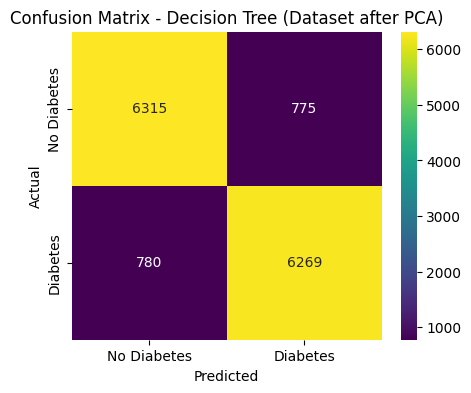

K-Fold Cross Validation Accuracy: 0.8889

Training K-Nearest Neighbors...

--- K-Nearest Neighbors Performance (Dataset after PCA) ---
Test Accuracy: 0.9192
Precision: 0.9042
Recall: 0.9372
F1 Score: 0.9204
AUC-ROC Score: 0.9192

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      7090
           1       0.90      0.94      0.92      7049

    accuracy                           0.92     14139
   macro avg       0.92      0.92      0.92     14139
weighted avg       0.92      0.92      0.92     14139



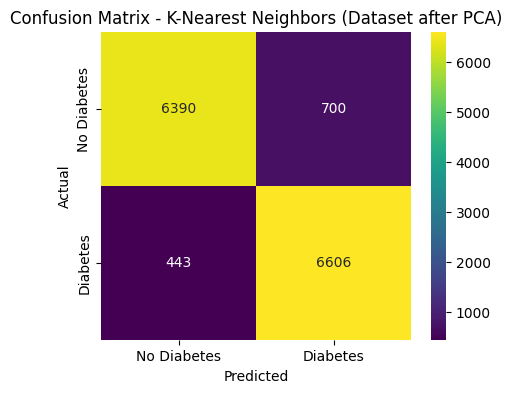

K-Fold Cross Validation Accuracy: 0.9175


In [ ]:
train_evaluate(final_df, "Dataset after PCA")

# 6. Ensemble methods

We employ a bagging classifier as well to determine if the model performance can be enhanced further.

In [ ]:
from sklearn.ensemble import BaggingClassifier

def bagging_clf(df, dataset_name):
    print(f"\n=== Evaluating Bagging Classifier on {dataset_name} ===\n")

    X = df.drop(columns=['Diabetes_binary'])
    y = df['Diabetes_binary']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # create a bagging classifier using the base model
    bagging_model = BaggingClassifier(
      estimator=DecisionTreeClassifier(random_state=42),
      n_estimators=50,
      random_state=42
    )

    # train the bagged model
    bagging_model.fit(X_train_scaled, y_train)

    # evaluate bagged classifier performance
    evaluate(bagging_model, X_test_scaled, y_test, "Bagging Classifier", dataset_name)

    # cross-validation
    mean_cv_score = cross_validation(bagging_model, X, y)
    print(f"K-fold Cross Validation Accuracy: {mean_cv_score:.4f}")


=== Evaluating Bagging Classifiers on Dataset with 10 Most Important Features ===


--- Bagging Classifier Performance (Dataset with 10 Most Important Features) ---
Test Accuracy: 0.7193
Precision: 0.7112
Recall: 0.7357
F1 Score: 0.7232
AUC-ROC Score: 0.7193

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.72      7090
           1       0.71      0.74      0.72      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



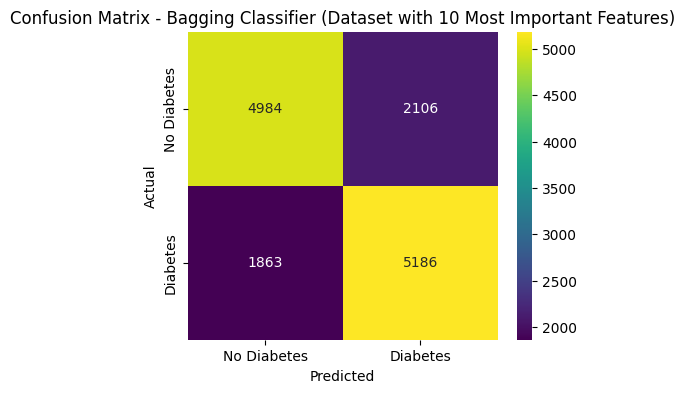

K-fold Cross Validation Accuracy: 0.7202


In [ ]:
bagging_clf(selected_df, "Dataset with 10 Most Important Features")


=== Evaluating Bagging Classifiers on Dataset after PCA ===


--- Bagging Classifier Performance (Dataset after PCA) ---
Test Accuracy: 0.9298
Precision: 0.9255
Recall: 0.9343
F1 Score: 0.9299
AUC-ROC Score: 0.9298

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7090
           1       0.93      0.93      0.93      7049

    accuracy                           0.93     14139
   macro avg       0.93      0.93      0.93     14139
weighted avg       0.93      0.93      0.93     14139



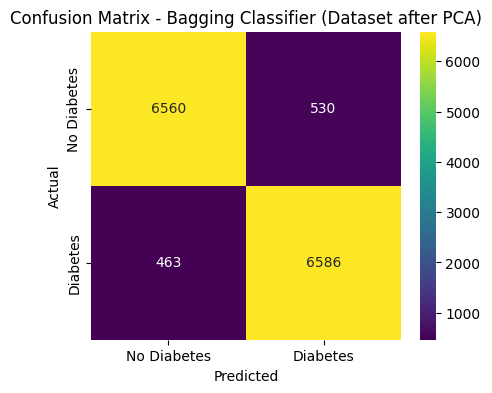

K-fold Cross Validation Accuracy: 0.9292


In [ ]:
bagging_clf(final_df, "Dataset after PCA")

AdaBoost is also applied in an attempt to elevate the model's accuracy.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def adaboost_clf(df, dataset_name):
    print(f"\n=== Evaluating AdaBoost Classifier on {dataset_name} ===\n")

    X = df.drop(columns=['Diabetes_binary'])
    y = df['Diabetes_binary']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # define an adaboost classifier using decision tree as the base estimator
    adaboost_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )

    # train the adaboost model
    adaboost_model.fit(X_train_scaled, y_train)

    # evaluate performance
    evaluate(adaboost_model, X_test_scaled, y_test, "AdaBoost Classifier", dataset_name)

    # perform Cross-Validation
    mean_cv_score = cross_validation(adaboost_model, X, y)
    print(f"K-Fold Cross Validation Accuracy: {mean_cv_score:.4f}")


=== Evaluating AdaBoost Classifier on Dataset with 10 Most Important Features ===


--- AdaBoost Classifier Performance (Dataset with 10 Most Important Features) ---
Test Accuracy: 0.7492
Precision: 0.7548
Recall: 0.7360
F1 Score: 0.7453
AUC-ROC Score: 0.7492

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      7090
           1       0.75      0.74      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



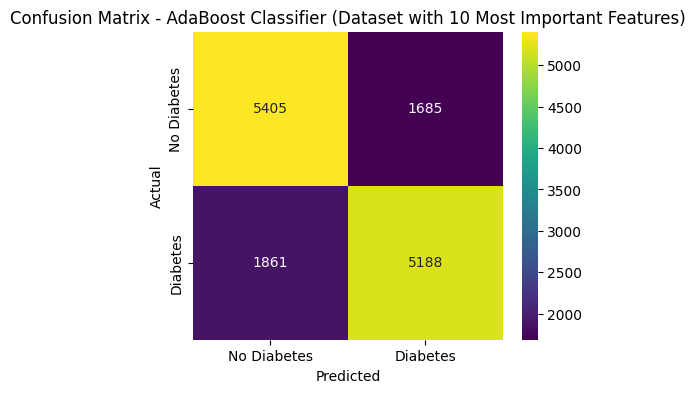

K-Fold Cross Validation Accuracy: 0.7524


In [ ]:
adaboost_clf(selected_df, "Dataset with 10 Most Important Features")


=== Evaluating AdaBoost Classifier on Dataset after PCA ===


--- AdaBoost Classifier Performance (Dataset after PCA) ---
Test Accuracy: 0.8517
Precision: 0.8337
Recall: 0.8776
F1 Score: 0.8551
AUC-ROC Score: 0.8518

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      7090
           1       0.83      0.88      0.86      7049

    accuracy                           0.85     14139
   macro avg       0.85      0.85      0.85     14139
weighted avg       0.85      0.85      0.85     14139



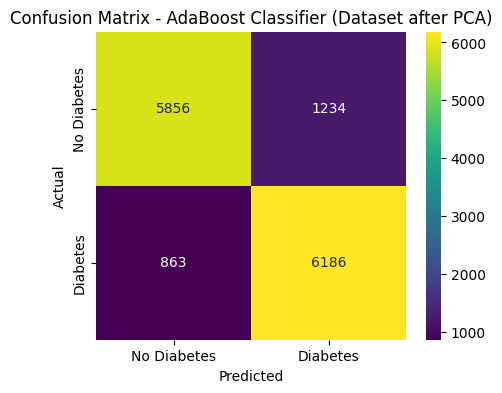

K-Fold Cross Validation Accuracy: 0.8545


In [ ]:
adaboost_clf(final_df, "Dataset after PCA")

From the results, we observe that Logistic Regression performs the best on the 10 selected features data set, while Random Forest has the best performance on the PCA data. However, the Bagging classifier on the PCA data produces the highest accuracy overall with an accuracy score of 92.98%. This highlights the effectiveness of ensemble methods in making optimal predictions.

# 7. diabetics' diet analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("nutrition.csv")
df.tail(10)

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
8779,8779,"Beef, braised, cooked, all grades, trimmed to ...",100 g,289,18g,7.3g,106mg,48.00 mg,109.8 mg,9.00 mcg,...,18.42 g,7.305 g,7.934 g,0.681 g,106.00 mg,0.0 g,0.94 g,0.00 mg,0.00 mg,52.48 g
8780,8780,"Beef, raw, select, trimmed to 1/8"" fat, separa...",100 g,148,6.4g,2.3g,70mg,55.00 mg,49.4 mg,4.00 mcg,...,6.41 g,2.313 g,2.830 g,0.396 g,70.00 mg,0.0 g,1.03 g,0.00 mg,0.00 mg,70.89 g
8781,8781,"Beef, raw, choice, trimmed to 1/8"" fat, separa...",100 g,161,8.3g,3.1g,63mg,56.00 mg,47.9 mg,3.00 mcg,...,8.29 g,3.057 g,3.576 g,0.467 g,63.00 mg,0.0 g,0.99 g,0.00 mg,0.00 mg,69.65 g
8782,8782,"Oil, uses similar to 95 degree hard butter, co...",100 g,884,100g,94g,0,6.00 mg,0.2 mg,0.00 mcg,...,100.00 g,93.701 g,0.257 g,0.000 g,0.00 mg,0.0 g,0.01 g,0.00 mg,0.00 mg,0.05 g
8783,8783,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,124,3.3g,1.3g,62mg,54.00 mg,64.6 mg,4.00 mcg,...,3.34 g,1.287 g,1.481 g,0.238 g,62.00 mg,0.0 g,1.12 g,0.00 mg,0.00 mg,72.64 g
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g
8788,8788,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


In [ ]:
#drop the index column
df = df.drop('Unnamed: 0', axis=1)

through the dataset, we realized that all the values under the column 'name', the first word before the comma is the food, hence lets add another column to categorize the foods.

In [ ]:
df['food_categories'] = df['name'].apply(lambda x: x.split(',')[0])
df.tail()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,food_categories
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g,Beef
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g,Lamb
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g,Lamb
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g,Beef
8788,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g,Beef


looks great

In [ ]:
df.shape

(8789, 77)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         8789 non-null   object
 1   serving_size                 8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

In [ ]:
#seperate unit label from weight values and change data types to float

import re
from collections import Counter

def find_common_unit(column):
    units = []
    numbers = []
    for value in column:
        value_str = str(value)
        match = re.search(r'(\d+\.?\d*)\s*(mg|mcg|g|IU)?', value_str)
        if match:
            number, unit = match.groups()
            numbers.append(number)
            units.append(unit if unit else 'unknown')
        else:
            numbers.append(pd.NA)
            units.append('unknown')

    if units:
        most_common_unit = Counter(units).most_common(1)[0][0]
    else:
        most_common_unit = 'unknown'
    return most_common_unit, numbers


new_column_names = {}
columns_to_exclude = ['name', 'calories', 'lucopene', 'food_categories']

for col in df.columns:
    if col not in columns_to_exclude:
        common_unit, numbers = find_common_unit(df[col])
        new_column_name = f"{col}_{common_unit}" if common_unit != 'unknown' else col
        new_column_names[col] = new_column_name
        df[col] = numbers
    else:
        new_column_names[col] = col

df.rename(columns=new_column_names, inplace=True)

for col in new_column_names.values():
    if 'IU' not in col and col not in columns_to_exclude:
        df[col] = pd.to_numeric(df[col], errors='coerce')


df.head()

,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,...,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g,food_categories
0,Cornstarch,100,381,0.1,NaN,0,9.0,0.4,0.0,0.0,...,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32,Cornstarch
1,"Nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,0.0,...,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,Nuts
2,"Eggplant, raw",100,25,0.2,NaN,0,2.0,6.9,22.0,0.0,...,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30,Eggplant
3,"Teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,0.0,...,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,Teff
4,"Sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,0.0,...,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,Sherbet


In [ ]:
pd.set_option('display.max_rows', 77)
df.isna().sum()

,0
name,0
serving_size_g,0
calories,0
total_fat_g,0
saturated_fat_g,1590
cholesterol_mg,0
sodium_mg,0
choline_mg,0
folate_mcg,0
folic_acid_mcg,0


In [ ]:
#drop rows (foods) that has incomplete nutrient info by dropping missing values in saturated_fat_g
df = df.dropna(subset=['saturated_fat_g'])
df = df.reset_index(drop=True)
df.head()

,name,serving_size_g,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,...,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g,food_categories
0,"Nuts, pecans",100,691,72.0,6.2,0,0.0,40.5,22.0,0.0,...,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,Nuts
1,"Teff, uncooked",100,367,2.4,0.4,0,12.0,13.1,0.0,0.0,...,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,Teff
2,"Sherbet, orange",100,144,2.0,1.2,1,46.0,7.7,4.0,0.0,...,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,Sherbet
3,"Cauliflower, raw",100,25,0.3,0.1,0,30.0,44.3,57.0,0.0,...,0.130,0.034,0.031,0.0,0.0,0.76,0.0,0.0,92.07,Cauliflower
4,"Taro leaves, raw",100,42,0.7,0.2,0,3.0,12.8,126.0,0.0,...,0.151,0.060,0.307,0.0,0.0,1.92,0.0,0.0,85.66,Taro leaves


In [ ]:
df.shape

(7199, 77)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#convert data types accordingly

df['vitamin_d_IU'] = pd.to_numeric(df['vitamin_d_IU'], errors='coerce')
df['vitamin_a_IU'] = pd.to_numeric(df['vitamin_a_IU'], errors='coerce')

77 features might be too lot for a diabetes analysis, lets narrow it down.

In [ ]:
nutrient_cols = [
    'name', 'calories', 'total_fat_g', 'saturated_fat_g', 'sodium_mg', 'carbohydrate_g',
    'sugars_g', 'fiber_g', 'phosphorous_mg', 'zink_mg', 'protein_g', 'cholesterol_mg', 'potassium_mg',
    'magnesium_mg', 'calcium_mg', 'vitamin_d_IU', 'vitamin_c_mg', 'vitamin_e_mg', 'vitamin_b12_mcg',
    'vitamin_b6_mg', 'niacin_mg', 'riboflavin_mg', 'folic_acid_mcg', 'monounsaturated_fatty_acids_g',
    'polyunsaturated_fatty_acids_g', 'alcohol_g', 'caffeine_mg', 'theobromine_mg', 'water_g', 'food_categories'
]

#create a new dataframe with only the selected nutrients
nutr_df = df[nutrient_cols].copy()
nutr_df.head(20)

,name,calories,total_fat_g,saturated_fat_g,sodium_mg,carbohydrate_g,sugars_g,fiber_g,phosphorous_mg,zink_mg,...,niacin_mg,riboflavin_mg,folic_acid_mcg,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,alcohol_g,caffeine_mg,theobromine_mg,water_g,food_categories
0,"Nuts, pecans",691,72.0,6.2,0.0,13.86,3.97,9.6,277.0,4.53,...,1.167,0.130,0.0,40.801,21.614,0.0,0.0,0.0,3.52,Nuts
1,"Teff, uncooked",367,2.4,0.4,12.0,73.13,1.84,8.0,429.0,3.63,...,3.363,0.270,0.0,0.589,1.071,0.0,0.0,0.0,8.82,Teff
2,"Sherbet, orange",144,2.0,1.2,46.0,30.40,24.32,1.3,40.0,0.48,...,0.063,0.097,0.0,0.530,0.080,0.0,0.0,0.0,66.10,Sherbet
3,"Cauliflower, raw",25,0.3,0.1,30.0,4.97,1.91,2.0,44.0,0.27,...,0.507,0.060,0.0,0.034,0.031,0.0,0.0,0.0,92.07,Cauliflower
4,"Taro leaves, raw",42,0.7,0.2,3.0,6.70,3.01,3.7,60.0,0.41,...,1.513,0.456,0.0,0.060,0.307,0.0,0.0,0.0,85.66,Taro leaves
5,"Lamb, raw, ground",282,23.0,10.0,59.0,0.00,0.00,0.0,157.0,3.41,...,5.960,0.210,0.0,9.600,1.850,0.0,0.0,0.0,59.47,Lamb
6,"Cheese, camembert",300,24.0,15.0,842.0,0.46,0.46,0.0,347.0,2.38,...,0.630,0.488,0.0,7.023,0.724,0.0,0.0,0.0,51.80,Cheese
7,Vegetarian fillets,290,18.0,2.8,490.0,9.00,0.80,6.1,450.0,1.40,...,12.000,0.900,0.0,4.376,9.332,0.0,0.0,0.0,45.00,Vegetarian fillets
8,"Crackers, rusk toast",407,7.2,1.4,253.0,72.30,0.00,0.0,153.0,1.10,...,4.625,0.399,23.0,2.755,2.310,0.0,0.0,0.0,5.50,Crackers
9,"Chicken, boiled, feet",215,15.0,3.9,67.0,0.20,0.00,0.0,83.0,0.69,...,0.400,0.200,0.0,5.500,2.980,0.0,0.0,0.0,65.80,Chicken


In [ ]:
nutr_df.shape

(7199, 30)

now lets standardized the unit

In [ ]:
# Convert all units to milligrams to standardize the unit

# Convert micrograms to milligrams
nutr_df['vitamin_b12_mg'] = nutr_df['vitamin_b12_mcg'] / 1000.0
nutr_df['folic_acid_mg'] = nutr_df['folic_acid_mcg'] / 1000.0

# Convert grams to milligrams
nutr_df['total_fat_mg'] = nutr_df['total_fat_g'] * 1000.0
nutr_df['saturated_fat_mg'] = nutr_df['saturated_fat_g'] * 1000.0
nutr_df['carbohydrate_mg'] = nutr_df['carbohydrate_g'] * 1000.0
nutr_df['sugars_mg'] = nutr_df['sugars_g'] * 1000.0
nutr_df['fiber_mg'] = nutr_df['fiber_g'] * 1000.0
nutr_df['protein_mg'] = nutr_df['protein_g'] * 1000.0
nutr_df['monounsaturated_fatty_acids_mg'] = nutr_df['monounsaturated_fatty_acids_g'] * 1000.0
nutr_df['polyunsaturated_fatty_acids_mg'] = nutr_df['polyunsaturated_fatty_acids_g'] * 1000.0
nutr_df['alcohol_mg'] = nutr_df['alcohol_g'] * 1000.0
nutr_df['water_mg'] = nutr_df['water_g'] * 1000.0

# Convert IU to micrograms for Vitamin D (then to mg)
nutr_df['vitamin_d_mg'] = (nutr_df['vitamin_d_IU'] * 0.025) / 1000.0

# Drop the old columns that have been converted
nutr_df.drop(columns=['vitamin_b12_mcg', 'folic_acid_mcg', 'total_fat_g', 'saturated_fat_g',
                      'carbohydrate_g', 'sugars_g', 'fiber_g', 'protein_g',
                      'monounsaturated_fatty_acids_g', 'polyunsaturated_fatty_acids_g',
                      'vitamin_d_IU', 'alcohol_g', 'water_g'], inplace=True)

nutr_df.head(10)

,name,calories,sodium_mg,phosphorous_mg,zink_mg,cholesterol_mg,potassium_mg,magnesium_mg,calcium_mg,vitamin_c_mg,...,saturated_fat_mg,carbohydrate_mg,sugars_mg,fiber_mg,protein_mg,monounsaturated_fatty_acids_mg,polyunsaturated_fatty_acids_mg,alcohol_mg,water_mg,vitamin_d_mg
0,"Nuts, pecans",691,0.0,277.0,4.53,0,410.0,121.0,70.0,1.1,...,6200.0,13860.0,3970.0,9600.0,9170.0,40801.0,21614.0,0.0,3520.0,0.00000
1,"Teff, uncooked",367,12.0,429.0,3.63,0,427.0,184.0,180.0,0.0,...,400.0,73130.0,1840.0,8000.0,13300.0,589.0,1071.0,0.0,8820.0,0.00000
2,"Sherbet, orange",144,46.0,40.0,0.48,1,96.0,8.0,54.0,2.3,...,1200.0,30400.0,24320.0,1300.0,1100.0,530.0,80.0,0.0,66100.0,0.00000
3,"Cauliflower, raw",25,30.0,44.0,0.27,0,299.0,15.0,22.0,48.2,...,100.0,4970.0,1910.0,2000.0,1920.0,34.0,31.0,0.0,92070.0,0.00000
4,"Taro leaves, raw",42,3.0,60.0,0.41,0,648.0,45.0,107.0,52.0,...,200.0,6700.0,3010.0,3700.0,4980.0,60.0,307.0,0.0,85660.0,0.00000
5,"Lamb, raw, ground",282,59.0,157.0,3.41,73,222.0,21.0,16.0,0.0,...,10000.0,0.0,0.0,0.0,16560.0,9600.0,1850.0,0.0,59470.0,0.00005
6,"Cheese, camembert",300,842.0,347.0,2.38,72,187.0,20.0,388.0,0.0,...,15000.0,460.0,460.0,0.0,19800.0,7023.0,724.0,0.0,51800.0,0.00045
7,Vegetarian fillets,290,490.0,450.0,1.40,0,600.0,23.0,95.0,0.0,...,2800.0,9000.0,800.0,6100.0,23000.0,4376.0,9332.0,0.0,45000.0,0.00000
8,"Crackers, rusk toast",407,253.0,153.0,1.10,78,245.0,36.0,27.0,0.0,...,1400.0,72300.0,0.0,0.0,13500.0,2755.0,2310.0,0.0,5500.0,0.00000
9,"Chicken, boiled, feet",215,67.0,83.0,0.69,84,31.0,5.0,88.0,0.0,...,3900.0,200.0,0.0,0.0,19400.0,5500.0,2980.0,0.0,65800.0,0.00020


In [ ]:
print(nutr_df['food_categories'].nunique())

846


In [ ]:
nutr_df.describe()

,calories,sodium_mg,phosphorous_mg,zink_mg,cholesterol_mg,potassium_mg,magnesium_mg,calcium_mg,vitamin_c_mg,vitamin_e_mg,...,saturated_fat_mg,carbohydrate_mg,sugars_mg,fiber_mg,protein_mg,monounsaturated_fatty_acids_mg,polyunsaturated_fatty_acids_mg,alcohol_mg,water_mg,vitamin_d_mg
count,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,...,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000
mean,255.973330,323.619669,176.351160,2.289844,46.883317,278.887623,35.659814,78.535769,5.553369,1.018790,...,4192.790665,23156.053619,6575.700792,2150.201417,13243.875538,4592.809557,2566.262675,11.209890,49151.301570,0.000423
std,166.281991,743.063434,175.143028,3.545086,128.065890,315.294897,59.173970,179.545862,46.104385,4.179203,...,6877.009023,28128.419444,13420.534725,4486.064329,10259.300108,7287.862918,5475.288771,458.855227,29605.848132,0.003362
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,55.000000,73.000000,0.430000,0.000000,133.000000,13.000000,10.000000,0.000000,0.000000,...,700.000000,0.000000,0.000000,0.000000,4370.000000,653.000000,341.000000,0.000000,13650.000000,0.000000
50%,221.000000,115.000000,165.000000,1.190000,12.000000,239.000000,22.000000,21.000000,0.000000,0.170000,...,2200.000000,8840.000000,280.000000,200.000000,10840.000000,2416.000000,858.000000,0.000000,59300.000000,0.000000
75%,361.000000,450.000000,226.500000,3.210000,72.000000,339.000000,31.000000,74.000000,1.000000,0.510000,...,5000.000000,44800.000000,4905.000000,2500.000000,21390.000000,5640.000000,2403.000000,0.000000,72315.000000,0.000075
max,902.000000,26000.000000,6869.000000,90.950000,3100.000000,10100.000000,781.000000,4332.000000,1900.000000,149.400000,...,96000.000000,98550.000000,97150.000000,79000.000000,88320.000000,83689.000000,74623.000000,26000.000000,98280.000000,0.250000


lets try clustering analysis, first we have to standardize their scale as "calories" does not have any unit like the rest of them.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = nutr_df.select_dtypes(include=['number']).columns  # Select only numeric columns
training = pd.DataFrame(scaler.fit_transform(nutr_df[numeric_cols]), columns=numeric_cols)
training.head()


,calories,sodium_mg,phosphorous_mg,zink_mg,cholesterol_mg,potassium_mg,magnesium_mg,calcium_mg,vitamin_c_mg,vitamin_e_mg,...,saturated_fat_mg,carbohydrate_mg,sugars_mg,fiber_mg,protein_mg,monounsaturated_fatty_acids_mg,polyunsaturated_fatty_acids_mg,alcohol_mg,water_mg,vitamin_d_mg
0,2.616380,-0.435551,0.574706,0.631948,-0.366113,0.415869,1.442291,-0.047544,-0.096600,0.091222,...,0.291893,-0.330509,-0.194171,1.660769,-0.397119,4.968632,3.479097,-0.024432,-1.541401,-0.125774
1,0.667747,-0.419401,1.442629,0.378058,-0.366113,0.469791,2.507023,0.565155,-0.120460,-0.224649,...,-0.551556,1.776759,-0.352894,1.304084,0.005471,-0.549419,-0.273112,-0.024432,-1.362369,-0.125774
2,-0.673441,-0.373641,-0.778567,-0.510558,-0.358304,-0.580093,-0.467465,-0.136664,-0.070570,-0.241400,...,-0.435218,0.257549,1.322267,-0.189534,-1.183777,-0.557515,-0.454119,-0.024432,0.572518,-0.125774
3,-1.389142,-0.395175,-0.755727,-0.569799,-0.366113,0.063794,-0.349161,-0.314904,0.925066,-0.224649,...,-0.595182,-0.646582,-0.347678,-0.033484,-1.103844,-0.625578,-0.463069,-0.024432,1.449770,-0.125774
4,-1.286899,-0.431514,-0.664367,-0.530305,-0.366113,1.170771,0.157854,0.158546,1.007493,0.239586,...,-0.580640,-0.585074,-0.265708,0.345494,-0.805557,-0.622010,-0.412658,-0.024432,1.233244,-0.125774


looks nice. lets try hierarchical clustering analysis, but first, lets visualise the hierarchical using dendrogram to find the optimal value for clusters.

Text(0.5, 1.0, 'Agglomerative Clustering')

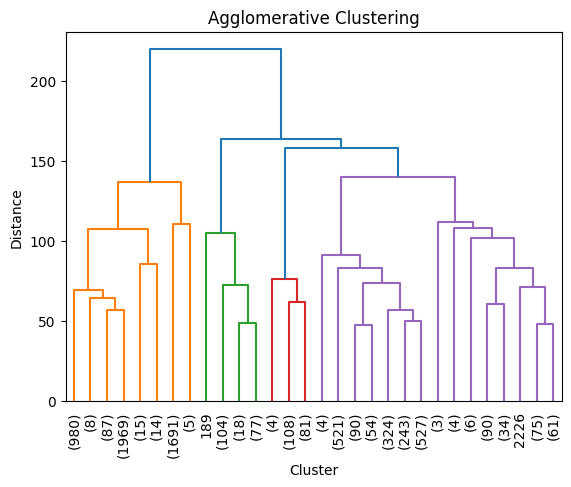

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

tree = linkage(training,method = 'ward')
dendrogram(tree, truncate_mode = 'lastp')
plt.xticks(rotation = 90, fontsize = 10)
plt.ylabel('Distance')
plt.xlabel('Cluster')
plt.title('Agglomerative Clustering')

from the dendrogram, we can see that there are 4 clusters, so the optimal value will be set to 4 for the agglomerative clustering.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

nutr = AgglomerativeClustering(n_clusters = 4)
nutr.fit(training)

nutr_df['label'] = nutr.labels_

lets try visualise these clusters using PCA

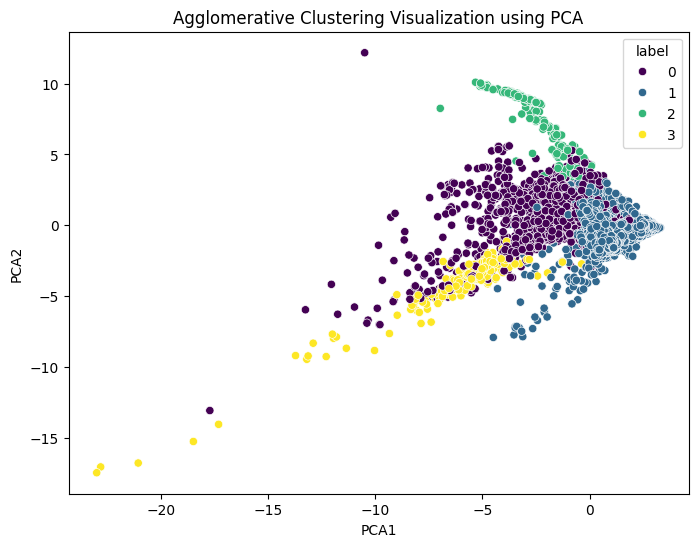

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_results = pca.fit_transform(training)

pca_df = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
pca_df['label'] = nutr_df['label']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='viridis')
plt.title('Agglomerative Clustering Visualization using PCA')
plt.show()


above is the visualisation of the clusters, but what we really want to know is what actually separates them. lets find out by analysing their content.

In [ ]:
pd.set_option('display.max_columns', None)
result = nutr_df.groupby('label').agg({col: ['mean', 'median', 'std'] for col in nutr_df.select_dtypes(include='number').columns})
result

calories                      sodium_mg                      \
             mean median         std        mean median          std   
label                                                                  
0      402.181149  390.0  102.015384  500.138930  333.0  1266.855776   
1      167.171524  158.0   88.106472  249.549381   80.0   347.507695   
2      768.295000  884.0  143.398373  152.975000    5.0   328.574314   
3      376.212435  380.0   39.010702  467.663212  489.0   227.798238   

      phosphorous_mg                      zink_mg                   \
                mean median         std      mean median       std   
label                                                                
0         235.768778  165.0  273.317662  1.659666   0.92  2.075574   
1         155.130216  169.0  101.138270  2.364619   1.40  3.413575   
2          28.780000    0.0   51.512321  0.279200   0.00  0.529376   
3         226.523316  189.0  164.961140  9.176891   7.60  8.920198   

      cholesterol_mg                    potassium_mg                     \
                mean median         std         mean median         std   
label                                                                     
0           8.954345    0.0   25.738510   368.743250  203.0  535.792770   
1          64.699937   58.0  151.526213   250.893688  255.0  137.840631   
2          53.325000    0.0  108.863380    45.230000    0.0   88.415403   
3           0.279793    0.0    1.332469   264.373057  215.0  201.365975   

      magnesium_mg                    calcium_mg                     \
              mean median        std        mean median         std   
label                                                                 
0        70.504173   35.0  97.179980  156.679921   56.0  284.272687   
1        20.742713   20.0  15.772311   40.757391   17.0   55.950853   
2         3.895000    0.0  11.853968    7.245000    0.5   13.308288   
3        69.414508   55.0  64.798680  261.145078  127.0  366.925046   

      vitamin_c_mg                   vitamin_e_mg                    \
              mean median        std         mean median        std   
label                                                                 
0         8.553608    0.0  82.119902     1.769740   0.17   5.959807   
1         3.312833    0.0  12.828076     0.327473   0.16   0.616196   
2         0.053500    0.0   0.240785     6.944950   3.00  10.048157   
3        34.950259   20.0  54.500544     4.034197   0.50  10.023907   

      vitamin_b6_mg                   niacin_mg                     \
               mean median       std       mean  median        std   
label                                                                
0          0.257394   0.10  0.448811   3.452570   2.710   3.611037   
1          0.250006   0.18  0.222923   3.563511   3.363   3.051669   
2          0.036025   0.00  0.081449   0.653710   0.000   1.443102   
3          2.073067   1.78  1.422307  21.128114  18.220  10.426048   

      riboflavin_mg                  caffeine_mg                    \
               mean median       std        mean median        std   
label                                                                
0          0.277606  0.218  0.271473    5.567501    0.0  94.507175   
1          0.204138  0.173  0.276767    0.084714    0.0   3.133488   
2          0.032360  0.000  0.060600    0.000000    0.0   0.000000   
3          1.811845  1.520  0.940284    0.461140    0.0   1.517191   

      theobromine_mg                    vitamin_b12_mg                     \
                mean median         std           mean   median       std   
label                                                                       
0          17.753068    0.0  124.892277       0.000356  0.00000  0.001235   
1           0.587125    0.0    6.408069       0.001802  0.00059  0.005423   
2           0.000000    0.0    0.000000       0.000269  0.00000  0.001014   
3           7.108808    0.0   26.079677       0

lets look at their mean values

In [ ]:
mean_values = nutr_df.select_dtypes(include='number').groupby(nutr_df['label']).mean().T
mean_values

label,0,1,2,3
calories,402.181149,167.171524,768.295000,376.212435
sodium_mg,500.138930,249.549381,152.975000,467.663212
phosphorous_mg,235.768778,155.130216,28.780000,226.523316
zink_mg,1.659666,2.364619,0.279200,9.176891
cholesterol_mg,8.954345,64.699937,53.325000,0.279793
potassium_mg,368.743250,250.893688,45.230000,264.373057
magnesium_mg,70.504173,20.742713,3.895000,69.414508
calcium_mg,156.679921,40.757391,7.245000,261.145078
vitamin_c_mg,8.553608,3.312833,0.053500,34.950259
vitamin_e_mg,1.769740,0.327473,6.944950,4.034197


from the result above, we can conclude that;

- cluster 0 is high in sodium, phosphorus, potassium, magnesium, caffeine and theobromine.
- cluster 1 is high in cholesterol, protein and water
- cluster 2 is high in calories, vitamin e, both fats, both MUFA and PUFA, and the only cluster to have alcohol content.
- cluster 3 is high in zink, calcium, vitamin c, vitamin b6, niacin (vitamin b2), riboflavin, vitamin b12, folic acid, carbs, sugars, fiber and vitamin d

lets analyse further.

### cluster 0;
- has theobromine, which is very rich in chocolate.
- caffeine also can be found in chocolate.
- high in sodium (which basically is salt)
- also has good amount of calories, both fats, MUFA and PUFA, sugars and carbs
- cluster 0 might be for SNACKS (salty foods, chocolate, etc)

### cluster 1;
- the first thing we can highlight is that this cluster has protein
- straight giveaway that this cluster might be for meats
- also has cholesterol which can be found a lot in meats
- which makes sense why it has the lowest amount of vitamin e since vitamin e is like rich in plant-based.

### cluster 2;
- this group has a very high amount of both fats
- also has a very high amount of MUFA and PUFA
- 4 of these nutrients really hinting this cluster to be oil or maybe lard
- also has vitamin e, which can be found in a lot of oil, nuts

### cluster 3;
- this cluster has the most nutrient types, but lets focus on a few of them
- its high in carbs, sugars, fiber, zinc and more
- but interestingly, it also high in riboflavin, which can be found alot in fortified foods (breads, cereal, etc)
- since cereal particularly use starch, it makes sense why this cluster has a lot of carbs too.

lets see which food category dominates each cluster.

In [ ]:
pd.set_option('display.max_rows', None)
nutr_df[nutr_df['label'] == 0]['food_categories'].value_counts().head(10)

,count
food_categories,
Snacks,135
KEEBLER,125
Candies,123
Cereals ready-to-eat,99
Cookies,78
Nuts,67
Cheese,65
Bread,65
KELLOGG'S,64


In [ ]:
pd.set_option('display.max_rows', None)
nutr_df[nutr_df['label'] == 1]['food_categories'].value_counts().head(10)

,count
food_categories,
Beef,946
Pork,308
Lamb,281
Chicken,203
Fish,202
Soup,147
Babyfood,112
Veal,100
Fast foods,94


In [ ]:
pd.set_option('display.max_rows', None)
nutr_df[nutr_df['label'] == 2]['food_categories'].value_counts().head(10)

,count
food_categories,
Oil,71
Pork,15
Lamb,14
Margarine,14
Beef,13
Shortening,10
Veal,8
Salad dressing,6
Fat,6


In [ ]:
pd.set_option('display.max_rows', None)
nutr_df[nutr_df['label'] == 3]['food_categories'].value_counts().head(10)

,count
food_categories,
Cereals ready-to-eat,153
Babyfood,15
Formulated bar,10
Cereals,5
Snacks,2
Snack,1
Seaweed,1
Leavening agents,1
WORTHINGTON Chic-Ketts,1


lets further eleborate how each cluster could affect people with diabetes

### cluster 0
- high sodium intake could affect blood pressure
- caffeine and theobromine could affect blood sugar levels

### cluster 1
- it does contain high protein,
- but the cholesterol amount is also high which can be very bad for people with diabetes since they already have complications with their heart

### cluster 2
- high calorie can affect insulin resistance, which eventually causes high blood sugar levels
- however, since it also has a lot of MUFA and PUFA, these 2 can help in regulating blood sugar levels, which is actually very good for people with diabetes.

### cluster 3
- it has a lot of carbs and sugars, naturally consuming  a lot of these 2 would spike the blood sugar levels, which is very bad for people with diabetes
- however, the fiber can help in sugar absorption which is very beneficial for people with diabetes
- zinc, vitamin b and vitamin d can help with insulin function


generally speaking, all four clusters are not that good for people with diabetes, but if have to choose one, then cluster 3 might be the most suitable for diabetics out of all 4 clusters, with correct moderations.

**lets make something from cluster 3**

In [ ]:
cluster_3_df = nutr_df[nutr_df['label'] == 3].copy()

def classify_food(row):
    if row['sugars_mg'] < 5000 and row['fiber_mg'] > 3000 and row['carbohydrate_mg'] < 50000:
        return 'Recommended'
    elif row['sugars_mg'] < 10000 and row['fiber_mg'] > 1000 and row['carbohydrate_mg'] < 100000:
        return 'Limit'
    else:
        return 'Avoid'

cluster_3_df['diabetes_recommendation'] = cluster_3_df.apply(classify_food, axis=1)


In [ ]:
from IPython.display import display

recommended = cluster_3_df.loc[cluster_3_df['diabetes_recommendation'] == 'Recommended', ['name', 'sugars_mg', 'fiber_mg', 'carbohydrate_mg']]
limit = cluster_3_df.loc[cluster_3_df['diabetes_recommendation'] == 'Limit', ['name', 'sugars_mg', 'fiber_mg', 'carbohydrate_mg']]
avoid = cluster_3_df.loc[cluster_3_df['diabetes_recommendation'] == 'Avoid', ['name', 'sugars_mg', 'fiber_mg', 'carbohydrate_mg']]

print("Recommended Foods:")
display(recommended)

print("\nLimit Foods:")
display(limit)

print("\nAvoid Foods:")
display(avoid)

Recommended Foods:


,name,sugars_mg,fiber_mg,carbohydrate_mg
820,"Seaweed, dried, spirulina",3100.0,3600.0,23900.0
2127,"Leavening agents, active dry, baker's, yeast",0.0,26900.0,41220.0
3405,"WORTHINGTON Multigrain Cutlets, unprepared, ca...",200.0,4500.0,7300.0



Limit Foods:


,name,sugars_mg,fiber_mg,carbohydrate_mg
1283,"Snacks, almond, crisped rice bar",0.0,3600.0,64600.0
1434,"Babyfood, dry, rice and apples",3220.0,3000.0,86890.0
1721,"Babyfood, dry fortified, mixed, cereal",870.0,7500.0,73400.0
1772,"Cereals ready-to-eat, RALSTON TASTEEOS",3570.0,10700.0,75500.0
1811,"Cereals, dry, instant, CREAM OF WHEAT",400.0,3300.0,75500.0
1870,"Babyfood, dry fortified, rice, cereal",4850.0,1300.0,83140.0
2282,"Cereals ready-to-eat, RALSTON Corn Biscuits",9510.0,2600.0,85790.0
2361,"Babyfood, dry, with bananas, mixed, cereal",6680.0,7800.0,77100.0
2369,"WORTHINGTON Chic-Ketts, unprepared, frozen",100.0,1200.0,5100.0
2400,"Cereals, dry, plain, original, MALT-O-MEAL",0.0,2100.0,77250.0



Avoid Foods:


,name,sugars_mg,fiber_mg,carbohydrate_mg
287,"Babyfood, cookies",24200.0,200.0,67100.0
649,"Snack, original bar, BALANCE",34890.0,3100.0,48730.0
1581,"Cereals ready-to-eat, GOLDEN CRISP, POST",53600.0,5000.0,90100.0
1625,"Babyfood, dry fortified, barley, cereal",13200.0,6600.0,69400.0
1720,"Cereals ready-to-eat, ALPHA-BITS, POST",21000.0,7100.0,80300.0
1723,"Cereals ready-to-eat, POST Bran Flakes",18600.0,18300.0,80500.0
1932,"Formulated bar, chocolate, POWER BAR",30070.0,5700.0,69630.0
1954,"Cereals, dry, chocolate, MALT-O-MEAL",16630.0,2800.0,79550.0
2072,"Cereals ready-to-eat, COCO-ROOS, MALT-O-MEAL",48110.0,3300.0,86750.0
2099,"Cereals ready-to-eat, KELLOGG'S KRAVE Smores",31700.0,9400.0,76400.0


although we dont get that much foods for recommended one, we do get a lot of "limit" foods. people with diabetes can eat foods in this category but with proper moderation.